# Installation and Setup

In [135]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [136]:
#import dataset
from tensorflow.keras.datasets import mnist

In [137]:
#load dataset
(x_train,y_train),(x_test,y_test) =mnist.load_data()

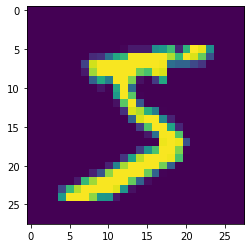

In [138]:
plt.imshow(x_train[0])

In [139]:
y_train[0]

5

In [140]:
(x_train.min(), x_train.max()),(y_train.min(), y_train.max())

((0, 255), (0, 9))

In [141]:
#Normalize the image
x_train=x_train/255.0
x_test=x_test/255.0

In [142]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [143]:
#reshape the images from 2d to 3d
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28,1)


In [144]:
print(x_train[0].shape) #input_shape

(28, 28, 1)


# Building the Model

In [145]:
#define object
model = tf.keras.models.Sequential()

In [146]:
#Add first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]))


In [147]:
#Add second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
#add maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=3))

In [148]:
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [149]:
#add Flatten layer
model.add(tf.keras.layers.Flatten())

In [150]:
#adding first fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [151]:
#adding second fully connected layer - output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [152]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [153]:
  #compile model
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

# Training Model

In [154]:
history = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 124s 131ms/step - loss: 0.3414 - sparse_categorical_accuracy: 0.8925 - val_loss: 0.0480 - val_sparse_categorical_accuracy: 0.9843
Epoch 2/10
938/938 [==============================] - 123s 131ms/step - loss: 0.0559 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0346 - val_sparse_categorical_accuracy: 0.9881
Epoch 3/10
938/938 [==============================] - 123s 132ms/step - loss: 0.0399 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0316 - val_sparse_categorical_accuracy: 0.9894
Epoch 4/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.0291 - val_sparse_categorical_accuracy: 0.9899
Epoch 5/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.0305 - val_sparse_categorical_accuracy: 0.9901
Epoch 6/10
938/938 [==============================] - 124s 132ms/step - loss: 0.

In [155]:
# model prediction
y_pred = model.predict_classes(x_test)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [156]:
#checking predictions
y_pred[43], y_test[43]

(2, 2)

In [157]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc_cm = accuracy_score(y_test,y_pred)
print(cm)

print('accuracy score: {}'.format(acc_cm))

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1131    1    2    0    1    0    0    0    0]
 [   1    0 1026    0    0    0    0    5    0    0]
 [   0    0    1 1007    0    0    0    0    1    1]
 [   0    0    0    0  973    0    1    0    0    8]
 [   1    0    0    5    0  884    1    0    0    1]
 [   6    3    0    0    1    2  945    0    1    0]
 [   0    3    3    0    0    0    0 1020    1    1]
 [   1    0    1    0    1    0    0    1  968    2]
 [   0    0    1    1    6    2    0    6    2  991]]
accuracy score: 0.9924


# Learning Curve

In [158]:
def learning_curve(history,epoch):

  #training vs validation accuracy
  epoch_range= range(1,epoch+1)
  plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()


  #training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

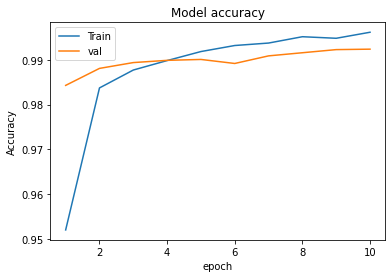

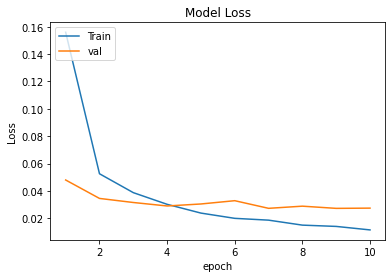

In [159]:
learning_curve(history,10)